# Application de calculs mathématiques aux Features.

De nouvelles fonctionnalités peuvent être créées en combinant deux ou plusieurs variables. Les variables peuvent être combinées automatiquement ou en utilisant la connaissance du domaine des données et de l'industrie. Par exemple, en finance, on combine des informations sur le revenu et la dette acquise pour déterminer le revenu disponible.
$$ disposable\   income = income - total\  debt.$$

De même, si un client a des dettes sur de nombreux produits financiers, par exemple un prêt automobile, un prêt immobilier et des cartes de crédit, nous pouvons déterminer la dette totale en ajoutant toutes ces variables :

$$Total\ debt = car\ loan\ balance + credit\ card\ balance + mortgage\ balance$$

Dans les exemples précédents, les fonctions mathématiques utilisées pour combiner les variables existantes sont dérivées via la connaissance du domaine de l'industrie. Nous pouvons également combiner des variables automatiquement, en créant des combinaisons polynomiales des variables existantes dans l'ensemble de données en utilisant des algorithmes prêts à l'emploi tels que des arbres de décision et Analyse en composantes principales (PCA). Dans cet article, nous allons créer de nouvelles fonctionnalités en utilisant plusieurs fonctions mathématiques et algorithmes standard avec Python.

Ce cet article couvrira les recettes suivantes :

* Combiner plusieurs fonctionnalités avec des opérations statistiques.
* Combiner des paires de caractéristiques avec des fonctions mathématiques.
* Exécution d'une expansion polynomiale.
* Dérivation de nouvelles fonctionnalités avec des arbres de décision.
* Réalisation de l'ACP.


## Combiner plusieurs fonctionnalités avec des opérations statistiques.

De nouvelles fonctionnalités peuvent être créées en effectuant des opérations mathématiques et statistiques sur des variables existantes. Nous avons mentionné précédemment que nous pouvons calculer la dette totale en additionnant la dette à travers les produits financiers individuels

$$ Total\ debt = car\ loan\ debt + credit\ card\ debt + mortgage\ debt$$

Nous pouvons également dériver d'autres caractéristiques pertinentes à l'aide d'opérations statistiques alternatives. Par exemple, nous pouvons déterminer l'endettement maximal d'un client sur l'ensemble des produits financiers, le temps minimum qu'il a passé à naviger sur une page de notre site Web ou le temps moyen qu'il a passé à lire un article de notre magazine :

$$ maximum\ debt = max(car\ loan\ balance,\ credit\ card\ balance,\ mortgage\  balance)$$

$$ minimum\ time\ on\ page = min(time\ on\ homepage,\ time\ on\ about\ page,\ time\ on\ the\ contact\ us\ page)$$

$$mean\ time\ reading\ article = (time\ on\ article\ 1\ +\ time\ on\ article\ 2\ +\ time\ on\ article 3) / count(articles)$$

Nous pouvons, en principe, utiliser n'importe quelle opération mathématique ou statistique pour créer de nouvelles fonctionnalités, telles que le produit, la moyenne, l'écart type, ou des valeurs maximales ou minimales. Dans cette recette, nous allons implémenter ces opérations mathématiques à l'aide de pandas.


Dans cette recette, nous utiliserons l'ensemble de données sur le cancer du sein fourni avec scikit-learn, qui contient des informations sur les tumeurs et autres anomalies médicales, ainsi qu'une cible indiquant si elles sont cancéreuses. Pour vous familiariser avec l'ensemble de données, exécutez les commandes suivantes dans un Jupyter Notebook ou une console Python :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

Dans cette recette, nous allons créer de nouvelles fonctionnalités en combinant des informations, c'est-à-dire des variables sur les tumeurs, à l'aide de plusieurs opérations mathématiques

In [2]:
# load the breast cancer dataset from sklearn
data = load_breast_cancer()

In [8]:
# print description of dataset

#print(data.DESCR)

In [4]:
# create a dataframe with the independent variables
df = pd.DataFrame(data.data, columns=data.feature_names)

# add the target
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Dans les lignes de code suivantes, nous allons créer de nouvelles fonctionnalités à l'aide d'opérations mathématiques multiples sur un sous-ensemble des fonctionnalités du jeu de données.

Commençons par créer une liste avec le sous-ensemble de fonctionnalités auquel nous appliquerons les différentes opérations mathématiques :

In [5]:
# make a list with the features we want to engineer

features = ['mean smoothness', 'mean compactness', 'mean concavity',
            'mean concave points', 'mean symmetry']

In [6]:
df[features].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry
0,0.11840,0.27760,0.3001,0.14710,0.2419
1,0.08474,0.07864,0.0869,0.07017,0.1812
2,0.10960,0.15990,0.1974,0.12790,0.2069
3,0.14250,0.28390,0.2414,0.10520,0.2597
4,0.10030,0.13280,0.1980,0.10430,0.1809


Grâce aux visualisations, nous pouvons facilement comprendre si les nouvelles fonctionnalités fournissent des informations précieuses. Dans cette section, nous allons créer des diagrammes en violon pour visualiser la distribution de l'une des caractéristiques nouvellement créées. Nous tracerons la distribution de la caractéristique séparément, pour les tumeurs cancéreuses et celles qui ne l'étaient pas

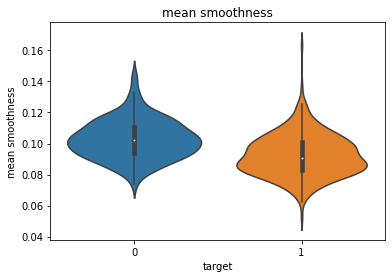

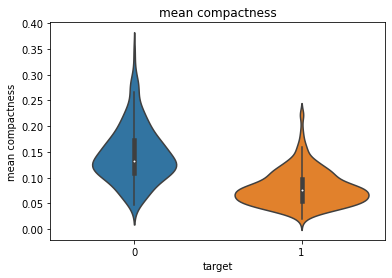

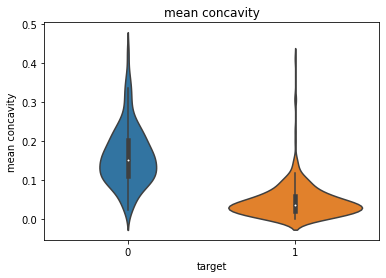

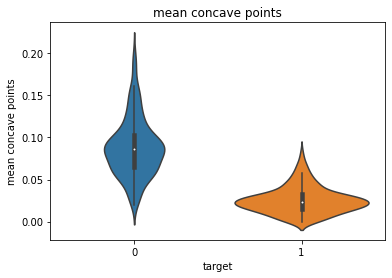

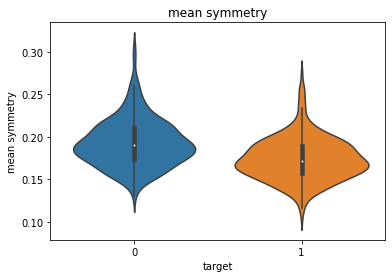

In [7]:
# make violin plots with the distribution of each feature

for f in features:
    sns.violinplot(x="target", y=f, data=df)
    plt.title(f)
    plt.show()

### Addition

In [9]:
# add the features
df['added_features'] = df[features].sum(axis=1)
df['added_features'].head()

0    1.08510
1    0.50165
2    0.80170
3    1.03270
4    0.71630
Name: added_features, dtype: float64

Text(0.5, 1.0, 'Added Features')

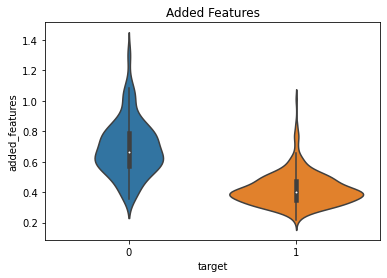

In [10]:
# violin plot with added features

sns.violinplot(x="target", y="added_features", data=df)

plt.title('Added Features')

### Product

In [11]:
# multiply the features

df['prod_features'] = df[features].prod(axis=1)

df['prod_features'].head()

0    0.000351
1    0.000007
2    0.000092
3    0.000267
4    0.000050
Name: prod_features, dtype: float64

Text(0.5, 1.0, 'Product of Features')

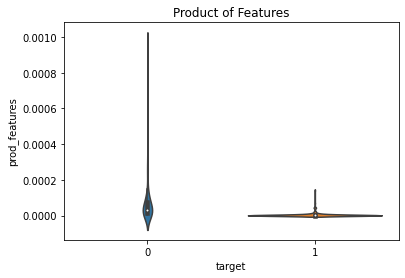

In [12]:
# violin plot with product of features

sns.violinplot(x="target", y="prod_features", data=df)

plt.title('Product of Features')

### Average

In [13]:
# mean of features

df['mean_features'] = df[features].mean(axis=1)

df['mean_features'].head()

0    0.21702
1    0.10033
2    0.16034
3    0.20654
4    0.14326
Name: mean_features, dtype: float64

Text(0.5, 1.0, 'Mean of Features')

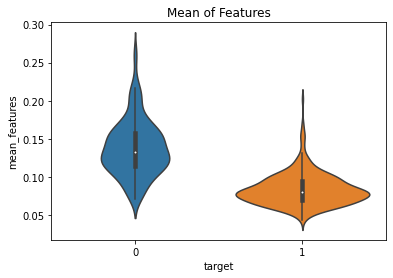

In [14]:
# violin plot with with of features

sns.violinplot(x="target", y="mean_features", data=df)

plt.title('Mean of Features')

### Standard deviation

In [15]:
# standard deviation of features

df['std_features'] = df[features].std(axis=1)

df['std_features'].head()

0    0.080321
1    0.045671
2    0.042333
3    0.078097
4    0.044402
Name: std_features, dtype: float64

Text(0.5, 1.0, 'Standard Deviation of Features')

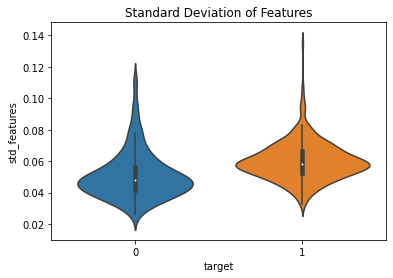

In [16]:
# violin plot with std of features

sns.violinplot(x="target", y="std_features", data=df)

plt.title('Standard Deviation of Features')

### Maximum, Minimum

In [17]:

# maximum of features

df['max_features'] = df[features].max(axis=1)

df['max_features'].head()

# minimum of the features

df['min_features'] = df[features].min(axis=1)

df['min_features'].head()

0    0.11840
1    0.07017
2    0.10960
3    0.10520
4    0.10030
Name: min_features, dtype: float64

In [18]:
# Perform all the operations in one line

df_t = df[features].agg(['sum', 'prod','mean','std', 'max', 'min'], axis='columns')
df_t.head()

,sum,prod,mean,std,max,min
0,1.08510,0.000351,0.21702,0.080321,0.3001,0.11840
1,0.50165,0.000007,0.10033,0.045671,0.1812,0.07017
2,0.80170,0.000092,0.16034,0.042333,0.2069,0.10960
3,1.03270,0.000267,0.20654,0.078097,0.2839,0.10520
4,0.71630,0.000050,0.14326,0.044402,0.1980,0.10030


## Combiner des paires de caractéristiques avec des fonctions mathématiques

Dans la recette précédente, en combinant plusieurs fonctionnalités avec des opérations statistiques, nous avons créé de nouvelles fonctionnalités en effectuant des opérations statistiques sur plusieurs variables. Cependant, certaines opérations mathématiques, telles que la soustraction ou la division, ont plus de sens lorsqu'elles sont effectuées entre deux caractéristiques, ou lorsque l'on considère plusieurs caractéristiques par rapport à une variable de référence. Ces opérations sont très utiles pour dériver des ratios, tels que le ratio dette/revenu.
$$ debt-to-income\ ratio = total\ debt / total\ income$$

Ou nous pouvons les utiliser pour des différences, par exemple, le revenu disponible.

$$disposable\ income = income\ -\ total\ debt$$

Dans cette recette, nous apprendrons à dériver de nouvelles caractéristiques par soustraction ou division à l'aide de pandas, et plus généralement, nous apprendrons à effectuer des opérations sur une variable de référence.



In [20]:
# Difference between 2 features - method 1

df['difference'] = df['worst compactness'].sub(df['mean compactness'])

df['difference'].head()

0    0.38800
1    0.10796
2    0.26460
3    0.58240
4    0.07220
Name: difference, dtype: float64

In [21]:

# Difference between 2 features - method 2

df['difference'] = df['worst compactness'] - (df['mean compactness'])

df['difference'].head()

0    0.38800
1    0.10796
2    0.26460
3    0.58240
4    0.07220
Name: difference, dtype: float64

Text(0.5, 1.0, 'Added Features')

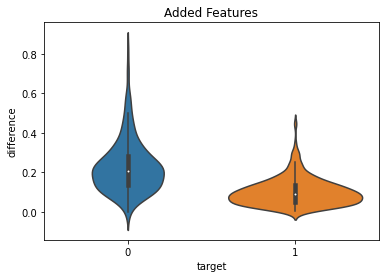

In [22]:
# violin plot of the substraction

sns.violinplot(x="target", y="difference", data=df)
plt.title('Added Features')

In [23]:
# Quotient of features - method 1

df['quotient'] = df['worst radius'].div(df['mean radius'])

df['quotient'].head()

0    1.410784
1    1.214876
2    1.197054
3    1.305604
4    1.110892
Name: quotient, dtype: float64

In [24]:
# Quotient of features - method 2

df['quotient'] = df['worst radius'] / (df['mean radius'])
df['quotient'].head()

0    1.410784
1    1.214876
2    1.197054
3    1.305604
4    1.110892
Name: quotient, dtype: float64

Text(0.5, 1.0, 'Quotient of Features')

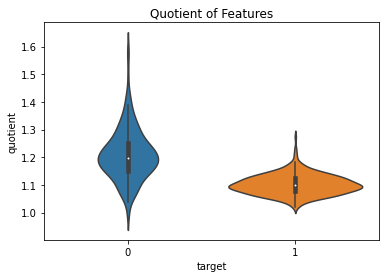

In [25]:
# violin plot with quotient

sns.violinplot(x="target", y="quotient", data=df)
plt.title('Quotient of Features')


Ensuite, nous comparerons un groupe de fonctionnalités à la vue agrégée d'un autre sous-ensemble de fonctionnalités. Commençons par capturer ces sous-ensembles de variables dans des listes

In [26]:

# features of interest
features = ['mean smoothness', 'mean compactness', 'mean concavity',
               'mean concave points', 'mean symmetry']

# features to aggregate
worst_f = ['worst smoothness', 'worst compactness', 'worst concavity',
               'worst concave points', 'worst symmetry']

Créer une nouvelle fonctionnalité avec la somme des fonctionnalités

In [27]:

# create new feature by sum of the worst features
df['worst'] = df[worst_f].sum(axis=1)

df['worst'].head()

0    2.2652
1    1.0130
2    1.6236
3    2.6843
4    1.1413
Name: worst, dtype: float64

In [28]:
df[features+['worst']].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,worst
0,0.11840,0.27760,0.3001,0.14710,0.2419,2.2652
1,0.08474,0.07864,0.0869,0.07017,0.1812,1.0130
2,0.10960,0.15990,0.1974,0.12790,0.2069,1.6236
3,0.14250,0.28390,0.2414,0.10520,0.2597,2.6843
4,0.10030,0.13280,0.1980,0.10430,0.1809,1.1413


Obtenons le rapport entre chacune des caractéristiques

In [29]:
# calculate the ratio of mutliple features vs the worst feature we created
# in previous cells
df[features] = df[features].div(df['worst'], axis=0)

df[features].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry
0,0.052269,0.122550,0.132483,0.064939,0.106790
1,0.083653,0.077631,0.085785,0.069269,0.178875
2,0.067504,0.098485,0.121582,0.078776,0.127433
3,0.053086,0.105763,0.089930,0.039191,0.096748
4,0.087882,0.116359,0.173486,0.091387,0.158503


## Exécution d'une expansion polynomiale.

Les variables existantes peuvent être combinées pour créer de nouvelles fonctionnalités pertinentes. Nous avons discuté de la façon de combiner des variables à l'aide d'opérations mathématiques et statistiques courantes dans les deux recettes précédentes, Combiner plusieurs fonctionnalités avec des opérations statistiques et Combiner des paires de fonctionnalités avec des fonctions mathématiques. Une combinaison d'une caractéristique avec elle-même, c'est-à-dire une combinaison polynomiale de la même caractéristique, peut également être assez informative ou augmenter le pouvoir prédictif de nos algorithmes. Par exemple, dans les cas où la cible suit une relation aquadratique avec une variable, la création d'un polynôme du second degré de la caractéristique nous permet de l'utiliser dans un modèle linéaire.

Des combinaisons polynomiales de variables peuvent renvoyer de nouvelles variables qui transmettent des informations supplémentaires et capturent l'interaction des fonctionnalités et peuvent donc être de meilleures entrées pour nos algorithmes d'apprentissage automatique, en particulier pour les modèles linéaires. Nous pouvons créer des variables polynomiales automatiquement en utilisant scikit-learn, et, dans cette recette, nous apprendrons comment le faire.


L'expansion polynomiale sert à automatiser la création de nouvelles caractéristiques, à capturer l'interaction des caractéristiques et à capturer les relations non linéaires potentielles entre les variables d'origine et la cible. L'utilisateur détermine quelles fonctionnalités combiner et quel degré polynomial utiliser.


Le transformateur PolynomialFeatures() de scikit-learn crée automatiquement toutes les combinaisons polynomiales des entités avec un degré inférieur ou égal au degré spécifié. Pour suivre facilement la recette, commençons par comprendre la sortie du transformateur PolynomialFeatures () de scikit-learn, lorsqu'il est utilisé avec les deuxième et troisième degrés dans un ensemble de données avec trois variables.

Les combinaisons polynomiales du second degré de trois variables (a, b et c) renvoient les nouvelles fonctionnalités suivantes :

$$ [a, b, c]^2 = 1,\ a,\ b,\ c,\ ab,\ ac,\ bc,\ a^2,\ b^2,\ c^2,\ abc$$

Notez comment nous avons toutes les interactions possibles de degré, 1 et 2. Le transformateur PolynomialFeatures() renvoie également le terme de biais 1.

Les combinaisons polynomiales du troisième degré des trois variables (a, b et c) renvoient les nouvelles fonctionnalités suivantes :

$$ [a, b, c]^3 = 1, a, b, c, ab, ac, bc, abc, a^2b, a^2c, b^2a, b^2c, c^2a, c^2b, a^3, b^3, c^3$$

Notez comment nous avons toutes les interactions possibles de degré 1, 2 et 3 et le terme de biais 1. Maintenant que nous comprenons la sortie de l'expansion polynomiale, passons à la recette.


Importez  pandas et les fonctions, classes et ensembles de données requis à partir de scikit-learn

In [30]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

Chargez l'ensemble de données Boston House Prizes dans une datframe pandas

In [31]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Sépaper l'ensemble de données en ensembles d'entrainement et de test

In [32]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

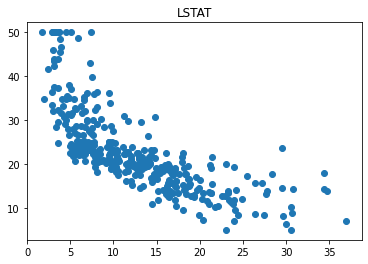

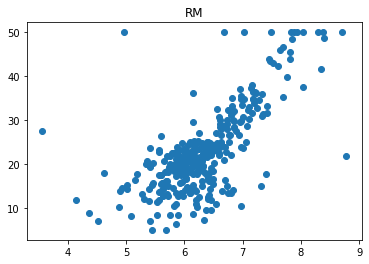

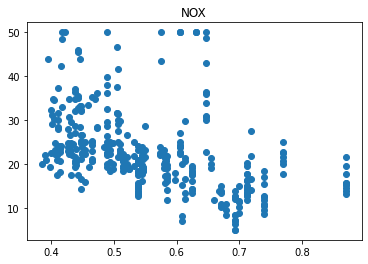

In [33]:

# plot relation of features of interest with the target

for f in ['LSTAT', 'RM', 'NOX']:
    plt.scatter(X_train[f], y_train)
    plt.title(f)
    plt.show()

Mettons en place le transformateur d'expansion polynomial de scikit-learn, pour créer les faetures par combinaison polynomiale d'un degré inférieur ou égale à 3 

In [34]:
# set up the polynomial expansion transformer

poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [35]:
# train the polynomial expansion transformer

poly.fit(X_train[['LSTAT', 'RM', 'NOX']])

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C')

In [36]:
# create the new features

train_t = poly.transform(X_train[['LSTAT', 'RM', 'NOX']])
test_t = poly.transform(X_test[['LSTAT', 'RM', 'NOX']])

In [37]:

# visualise the name of the created features

poly.get_feature_names(['LSTAT', 'RM', 'NOX'])

['LSTAT',
 'RM',
 'NOX',
 'LSTAT^2',
 'LSTAT RM',
 'LSTAT NOX',
 'RM^2',
 'RM NOX',
 'NOX^2',
 'LSTAT^3',
 'LSTAT^2 RM',
 'LSTAT^2 NOX',
 'LSTAT RM^2',
 'LSTAT RM NOX',
 'LSTAT NOX^2',
 'RM^3',
 'RM^2 NOX',
 'RM NOX^2',
 'NOX^3']

In [38]:
len(poly.get_feature_names(['LSTAT', 'RM', 'NOX']))

19

In [39]:
# capture the returned features in a dataframe
test_t = pd.DataFrame(test_t)

# add column names of created features
test_t.columns = poly.get_feature_names(['LSTAT', 'RM', 'NOX'])


test_t.head()

,LSTAT,RM,NOX,LSTAT^2,LSTAT RM,LSTAT NOX,RM^2,RM NOX,NOX^2,LSTAT^3,LSTAT^2 RM,LSTAT^2 NOX,LSTAT RM^2,LSTAT RM NOX,LSTAT NOX^2,RM^3,RM^2 NOX,RM NOX^2,NOX^3
0,7.34,6.333,0.460,53.8756,46.48422,3.37640,40.106889,2.913180,0.211600,395.446904,341.194175,24.782776,294.384565,21.382741,1.553144,253.996928,18.449169,1.340063,0.097336
1,9.53,6.216,0.631,90.8209,59.23848,6.01343,38.638656,3.922296,0.398161,865.523177,564.542714,57.307988,368.226392,37.379481,3.794474,240.177886,24.380992,2.474969,0.251240
2,10.50,6.373,0.550,110.2500,66.91650,5.77500,40.615129,3.505150,0.302500,1157.625000,702.623250,60.637500,426.458855,36.804075,3.176250,258.840217,22.338321,1.927833,0.166375
3,19.77,5.349,0.693,390.8529,105.74973,13.70061,28.611801,3.706857,0.480249,7727.161833,2090.672162,270.861060,565.655306,73.284563,9.494523,153.044524,19.827978,2.568852,0.332813
4,12.34,6.232,0.437,152.2756,76.90288,5.39258,38.837824,2.723384,0.190969,1879.080904,948.981539,66.544437,479.258748,33.606559,2.356557,242.037319,16.972129,1.190119,0.083453


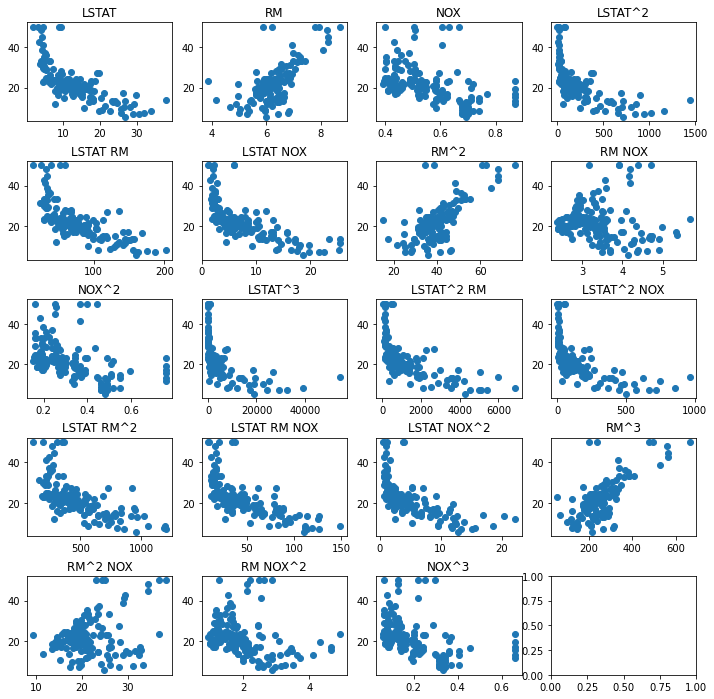

In [40]:
# plot the new features vs the target

# https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

def plot_features(df):

    # function plots 9 images
    nb_rows = 5
    nb_cols = 4
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            if n!=19:
                axs[i, j].scatter(test_t[test_t.columns[n]], y_test)
                axs[i, j].set_title(test_t.columns[n])
                n += 1
    plt.show()
    
plot_features(test_t)

## Dérivation de nouvelles fonctionnalités avec des arbres de décision.

Dans la solution gagnante du concours KDD en 2009, les auteurs ont créé de nouvelles fonctionnalités en combinant deux ou plusieurs variables à l'aide d'arbres de décision, puis ont utilisé ces variables pour former le modèle prédictif gagnant. Cette technique est particulièrement utile pour dériver des caractéristiques monotones avec la cible, ce qui est pratique pour les modèles linéaires. La procédure consiste à construire un arbre de décision à l'aide d'un sous-ensemble de fonctionnalités, généralement deux ou trois à la fois, puis à utiliser la prédiction de l'arbre en tant que nouvelle fonctionnalité.

La création de nouvelles fonctionnalités avec des arbres de décision crée non seulement des relations monotones entre les fonctionnalités et la cible, mais capture également les interactions des fonctionnalités, ce qui est utile lors de la création de modèles qui ne le font pas automatiquement, tels que les modèles linéaires.

Dans cette recette, nous allons apprendre à créer de nouvelles fonctionnalités avec des arbres de décision en utilisant pandas et scikit-learn

Commençons par importer les bibliothèques requises et préparer l'ensemble de données

In [41]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [42]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

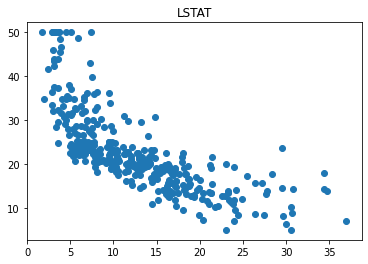

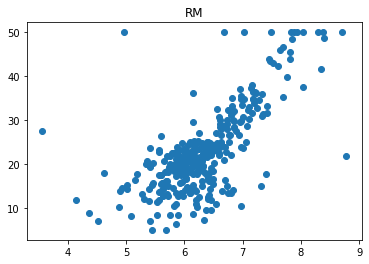

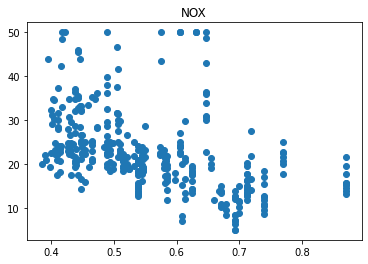

In [44]:
for f in ['LSTAT', 'RM', 'NOX']:
    plt.scatter(X_train[f], y_train)
    plt.title(f)
    plt.show()


Dans les lignes suivantes, nous allons créer une nouvelle entité à partir de trois variables existantes dans l'ensemble de données à l'aide d'un arbre de décision. Nous allons construire cet arbre de décision dans GridSearch() afin d'optimiser l'un de ses paramètres

In [45]:
# set up the grid with parameters to test
param_grid = {'max_depth': [3,4,None]}

In [46]:
# set up the tree within a grid search
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0),
                          cv = 5, 
                          scoring = 'neg_mean_squared_error',
                          param_grid = param_grid)

In [47]:
# train the decision tree
tree_model.fit(X_train[['LSTAT', 'RM', 'NOX']], y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, None]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [48]:
# create the new feature

X_train['new_feat'] = tree_model.predict(X_train[['LSTAT', 'RM', 'NOX']])
X_test['new_feat'] = tree_model.predict(X_test[['LSTAT', 'RM', 'NOX']])

Text(0.5, 1.0, 'Tree derived feature vs House Price')

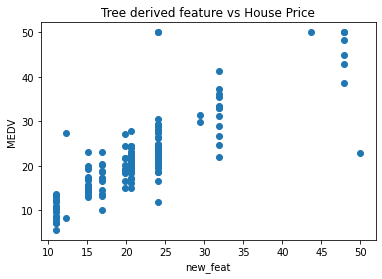

In [49]:
# plot the new feature

plt.scatter(X_test['new_feat'], y_test)
plt.ylabel('MEDV')
plt.xlabel('new_feat')
plt.title('Tree derived feature vs House Price')

## Réalisation de l'ACP

L4ACP est une technique de réduction de la dimensionnalité utilisé pour
réduire un ensemble de données de grande dimention en un sous-ensemble plus petit de composantes principales (PC), qui expliquent la plupart de la
vriabilité observée dans les données d'origine. le premier CP des données est

un vecteur duquel les observations varient le plus, ou en d'autres termes, une combinaison linéaire des variables de l'ensemble de données qui maximise la variance. Mathématiquement, le premier PC minimise la somme des carrés des distances entre chaque observation et le PC. Le deuxième PC est à nouveau une combinaison linéaire des variables d'origine, qui capture la plus grande variance restante et est soumis à la contrainte perpendiculaire au premier PC.

En général, nous pouvons construire autant de PC que de variables dans l'ensemble de données. Chaque PC est une combinaison linéaire des variables, orthogonale aux autres composantes, et maximise la variance restante, qui est laissée inexpliquée par les PC précédents. La façon dont ces PC sont construits signifie qu'il est souvent possible pour quelques-uns des premiers PC de capturer la plupart des informations des données d'origine, ainsi que la plupart de ses relations avec la cible.

Dans cette recette, nous allons implémenter PCA pour réduire les dimensions de nos données et créer de nouvelles fonctionnalités, les composants principaux, en utilisant scikit-learn

In [50]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

In [51]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:

# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [53]:
# set up the PCA

pca = PCA(n_components=None)

In [54]:
# train the PCA

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
# create the principal components

train_t = pca.transform(X_train)
test_t = pca.transform(X_test)

Lors de la création des composants principaux, quelques-uns des composants captureront la majeure partie de la variabilité des données d'origine. Pour identifier combien de composants capturent la plupart de la variabilité dans l'ensemble de données des prix des logements à Boston, nous pouvons tracer le pourcentage de variance expliqué (par chaque composant) par rapport au nombre de composants.

Text(0, 0.5, 'Percentage of Variance Explained')

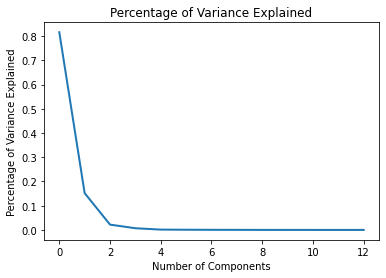

In [56]:

# determine the number of informative components

# the number of components is determined by the change
# in the decay in the percentage of variance explained
# by each component

plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained')

PCA est sensible à l'échelle des fonctionnalités ; par conséquent, il est conseillé, voire obligatoire, d'avoir des fonctionnalités à une échelle similaire avant d'adapter l'objet PCA de scikit-learn. 